In [1]:
import pandas as pd
import os
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

os.chdir(r"C:\Users\Yusuf\Desktop\staj\marmara")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
#pd.set_option("display.max_rows", None)
pd.options.mode.copy_on_write = True

In [2]:
dds_luadd = "saved_dds_luad.pkl"

with open(dds_luadd, "rb") as dosya:
    dds_luad = pickle.load(dosya)

dds_luscc = "saved_dds_lusc.pkl"

with open(dds_luscc, "rb") as dosya:
    dds_lusc = pickle.load(dosya)

res_luad = pd.read_csv(r"C:\Users\Yusuf\Desktop\staj\marmara\res_luad_lfc_padj.csv")
res_luad.set_index("gene_name", inplace=True)
res_lusc = pd.read_csv(r"C:\Users\Yusuf\Desktop\staj\marmara\res_lusc_lfc_padj.csv")
res_lusc.set_index("gene_name", inplace=True)


In [3]:
dds_luad

AnnData object with n_obs × n_vars = 600 × 58179
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'

In [4]:
dds_lusc

AnnData object with n_obs × n_vars = 553 × 58457
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'

In [5]:
res_luad

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name.1
gene_name,,,,,,,
TSPAN6,1375.390745,0.132951,0.123444,1.077018,2.814724e-01,0.562700,TSPAN6
DPM1,690.526627,0.079926,0.079313,1.007728,3.135852e-01,0.595289,DPM1
SCYL3,613.346245,-0.023223,0.068341,-0.339814,7.339968e-01,0.887277,SCYL3
C1orf112,490.519589,-0.157763,0.100230,-1.574010,1.154852e-01,0.340848,C1orf112
FGR,610.118369,0.027030,0.157284,0.171852,8.635538e-01,0.948319,FGR
...,...,...,...,...,...,...,...
CDR1,89.092841,-0.997745,0.366759,-2.720438,6.519544e-03,0.053166,CDR1
AC010980.1,28.613204,0.117449,0.184005,0.638291,5.232839e-01,0.767470,AC010980.1
AC073611.1,12.359207,0.628492,0.126308,4.975859,6.495883e-07,0.000072,AC073611.1


In [6]:
sig_luad = res_luad[(res_luad["padj"] < 0.01) & (abs(res_luad["log2FoldChange"]) > 0.5) & (res_luad["baseMean"] > 10)]
sig_luad_upreg = res_luad[(res_luad["padj"] < 0.01) & (res_luad["log2FoldChange"] > 0.5) & (res_luad["baseMean"] > 10)]
sig_luad_downreg = res_luad[(res_luad["padj"] < 0.01) & (res_luad["log2FoldChange"] < -0.5) & (res_luad["baseMean"] > 10)]

sig_lusc = res_lusc[(res_lusc["padj"] < 0.01) & (abs(res_lusc["log2FoldChange"]) > 0.5) & (res_lusc["baseMean"] > 10)]
sig_lusc_upreg = res_lusc[(res_luad["padj"] < 0.01) & (res_lusc["log2FoldChange"] > 0.5) & (res_lusc["baseMean"] > 10)]
sig_lusc_downreg = res_lusc[(res_luad["padj"] < 0.01) & (res_lusc["log2FoldChange"] < -0.5) & (res_lusc["baseMean"] > 10)]

######################################################################### - listeler - #########################################################################

siggen_list_luad = sig_luad.index.tolist()
siggen_list_luad_upreg = sig_luad_upreg.index.tolist()
siggen_list_luad_downreg = sig_luad_downreg.index.tolist()

siggen_list_lusc = sig_lusc.index.tolist()
siggen_list_lusc_upreg = sig_lusc_upreg.index.tolist()
siggen_list_lusc_downreg = sig_lusc_downreg.index.tolist()

siggen_list_luad_lusc = list(set(siggen_list_lusc) & set(siggen_list_luad))
siggen_list_luad_lusc_upreg = list(set(siggen_list_lusc_upreg) & set(siggen_list_luad_upreg))
siggen_list_luad_lusc_downreg = list(set(siggen_list_lusc_downreg) & set(siggen_list_luad_downreg))

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_18420\3161612668.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sig_lusc_upreg = res_lusc[(res_luad["padj"] < 0.01) & (res_lusc["log2FoldChange"] > 0.5) & (res_lusc["baseMean"] > 10)]
C:\Users\Yusuf\AppData\Local\Temp\ipykernel_18420\3161612668.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sig_lusc_downreg = res_lusc[(res_luad["padj"] < 0.01) & (res_lusc["log2FoldChange"] < -0.5) & (res_lusc["baseMean"] > 10)]


In [7]:
# burada significant gen adlarının birer listesini çıkardım, iki kanserde de etkili olan ortak genlerin de bir listesini çıakrttım, 
# up ve down regüleleri de ayırdım ve .txt dosyalarına kaydettim, şimdi de bunları cpdb'de okutacağım ve sonuçları da ekran görüntüsü olarak kaydedeceğim

#os.chdir(r"C:\Users\Yusuf\Desktop\staj\marmara\output")
#
#with open("siggen_list_luad.txt", "w") as dosya:
#    for eleman in siggen_list_luad:
#        dosya.write(eleman + "\n")  # Her elemanı yeni bir satıra yaz
#
#with open("siggen_list_luad_upreg.txt", "w") as dosya:
#    for eleman in siggen_list_luad_upreg:
#        dosya.write(eleman + "\n")  # Her elemanı yeni bir satıra yaz
#
#with open("siggen_list_luad_downreg.txt", "w") as dosya:
#    for eleman in siggen_list_luad_downreg:
#        dosya.write(eleman + "\n")  # Her elemanı yeni bir satıra yaz
#
#with open("siggen_list_lusc.txt", "w") as dosya:
#    for eleman in siggen_list_lusc:
#        dosya.write(eleman + "\n")  # Her elemanı yeni bir satıra yaz
#
#with open("siggen_list_lusc_upreg.txt", "w") as dosya:
#    for eleman in siggen_list_lusc_upreg:
#        dosya.write(eleman + "\n")  # Her elemanı yeni bir satıra yaz
#
#with open("siggen_list_lusc_downreg.txt", "w") as dosya:
#    for eleman in siggen_list_lusc_downreg:
#        dosya.write(eleman + "\n")  # Her elemanı yeni bir satıra yaz
#
#with open("siggen_list_luad_lusc.txt", "w") as dosya:
#    for eleman in siggen_list_luad_lusc:
#        dosya.write(eleman + "\n")  # Her elemanı yeni bir satıra yaz
#
#with open("siggen_list_luad_lusc_upreg.txt", "w") as dosya:
#    for eleman in siggen_list_luad_lusc_upreg:
#        dosya.write(eleman + "\n")  # Her elemanı yeni bir satıra yaz
#
#with open("siggen_list_luad_lusc_downreg.txt", "w") as dosya:
#    for eleman in siggen_list_luad_lusc_downreg:
#        dosya.write(eleman + "\n")  # Her elemanı yeni bir satıra yaz
#
#os.chdir(r"C:\Users\Yusuf\Desktop\staj\marmara")

In [10]:
unic_siggen_luad = (list(set(siggen_list_luad) - set(siggen_list_luad_lusc)))
unic_siggen_lusc = (list(set(siggen_list_lusc) - set(siggen_list_luad_lusc)))

In [14]:
#with open("unic_siggen_luad.txt", "w") as dosya:
#    for eleman in unic_siggen_luad:
#        dosya.write(eleman + "\n")  # Her elemanı yeni bir satıra yaz
#
#with open("unic_siggen_lusc.txt", "w") as dosya:
#    for eleman in unic_siggen_lusc:
#        dosya.write(eleman + "\n")  # Her elemanı yeni bir satıra yaz

şimdi grafiklerini çizdirip inceleyelim

PCA PLOTS

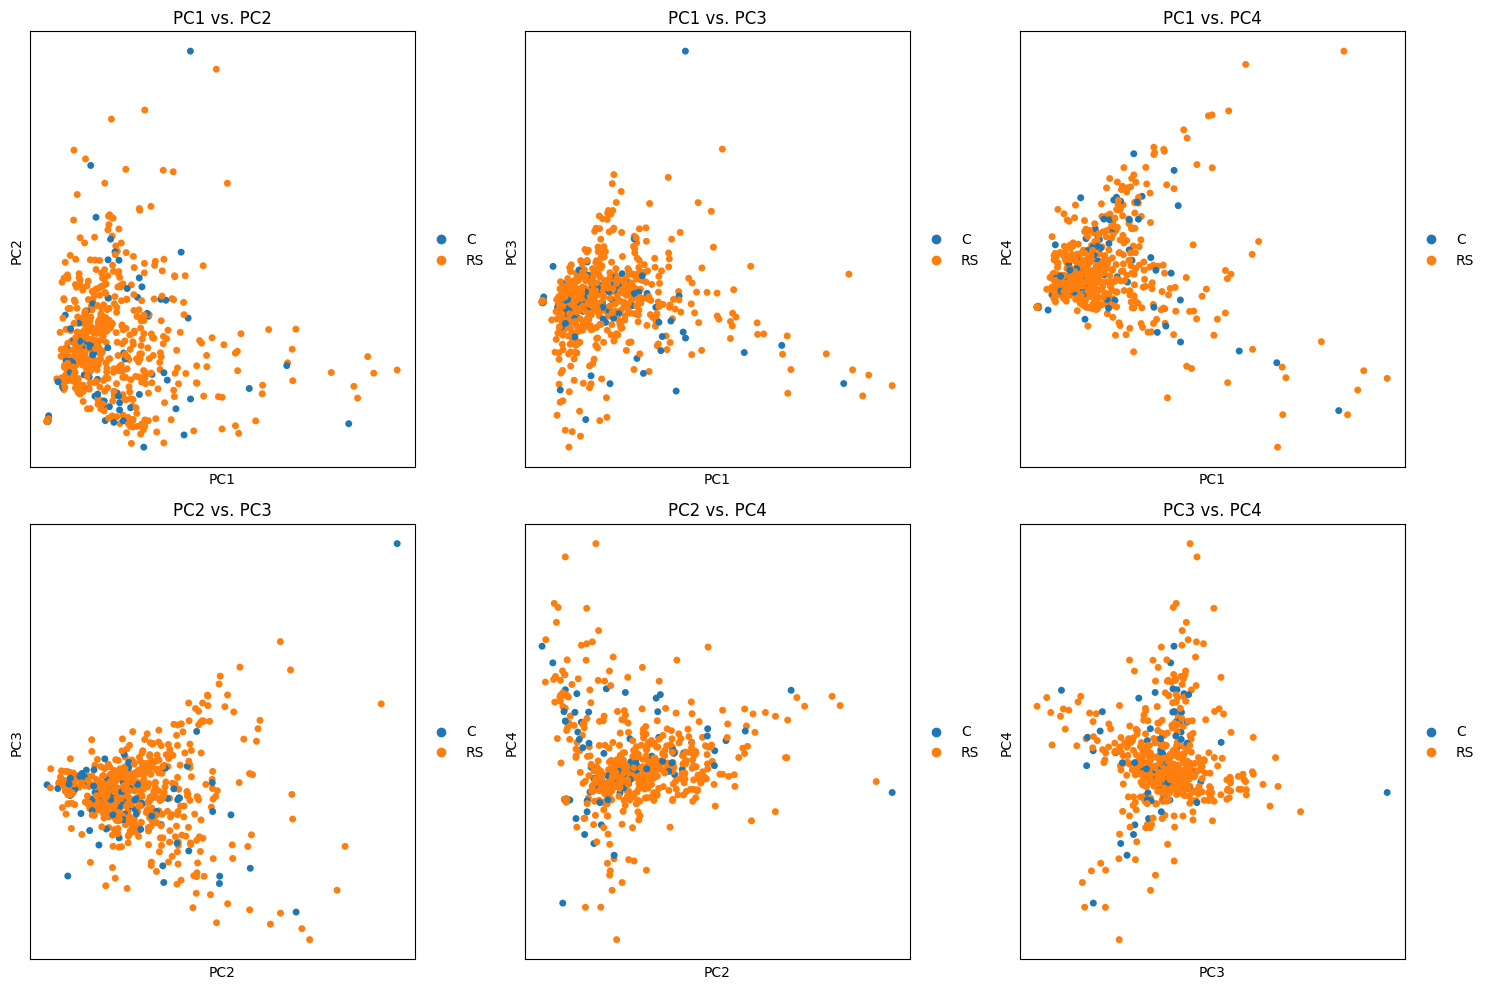

In [8]:
os.chdir(r"C:\Users\Yusuf\Desktop\staj\marmara\output")

# Gerekli sayıda bileşeni hesaplayın (PC4'e kadar)
sc.tl.pca(dds_luad, n_comps=4)

# Alt grafikleri oluşturmak için figür ve eksenleri hazırlayın
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 satır, 3 sütun

# Her bir alt grafik için PC kombinasyonlarını tanımlayın
pc_combinations = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

# Her bir alt grafik için PCA grafiğini çizin
for i, (pc_x, pc_y) in enumerate(pc_combinations):
    ax = axes[i // 3, i % 3]
    sc.pl.pca(dds_luad, color='Condition', size=100, components=f"{pc_x},{pc_y}", ax=ax, show=False)  # components parametresini string formatına dönüştürün
    ax.set_title(f'PC{pc_x} vs. PC{pc_y}')

# Tüm alt grafikleri gösterin
plt.tight_layout()  # Alt grafikler arasında boşluk bırakın
plt.savefig("luad_pca_plots.png")
plt.show()

os.chdir(r"C:\Users\Yusuf\Desktop\staj\marmara")

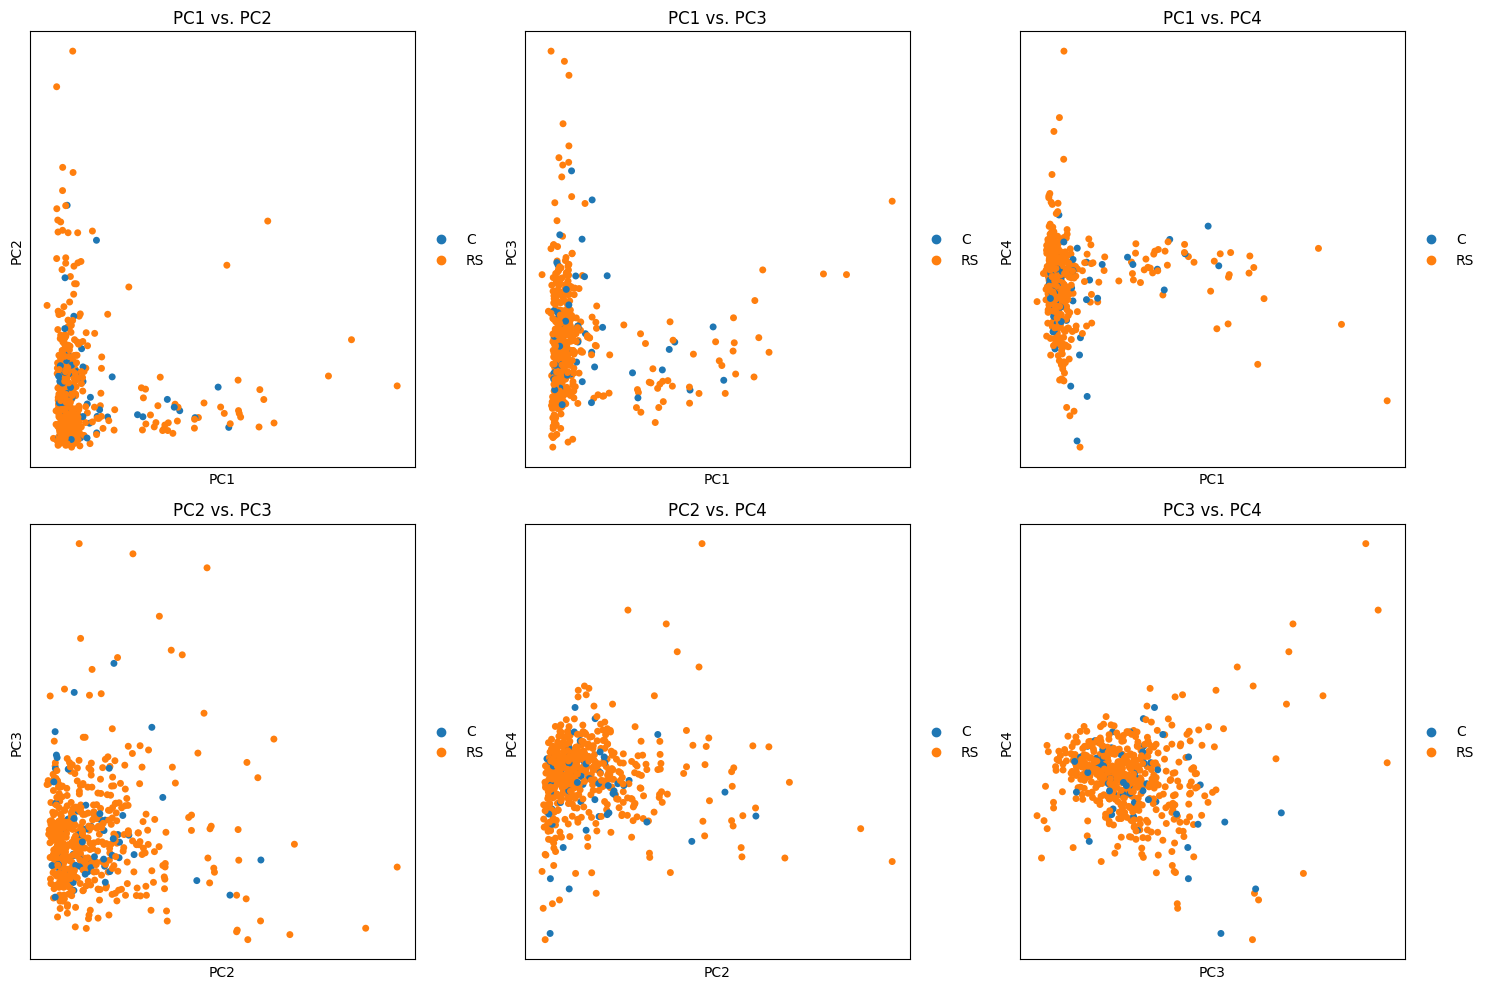

In [9]:
os.chdir(r"C:\Users\Yusuf\Desktop\staj\marmara\output")

# Gerekli sayıda bileşeni hesaplayın (PC4'e kadar)
sc.tl.pca(dds_lusc, n_comps=4)

# Alt grafikleri oluşturmak için figür ve eksenleri hazırlayın
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 satır, 3 sütun

# Her bir alt grafik için PC kombinasyonlarını tanımlayın
pc_combinations = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

# Her bir alt grafik için PCA grafiğini çizin
for i, (pc_x, pc_y) in enumerate(pc_combinations):
    ax = axes[i // 3, i % 3]
    sc.pl.pca(dds_lusc, color='Condition', size=100, components=f"{pc_x},{pc_y}", ax=ax, show=False)  # components parametresini string formatına dönüştürün
    ax.set_title(f'PC{pc_x} vs. PC{pc_y}')

# Tüm alt grafikleri gösterin
plt.tight_layout()  # Alt grafikler arasında boşluk bırakın
plt.savefig("lusc_pca_plots.png")
plt.show()

os.chdir(r"C:\Users\Yusuf\Desktop\staj\marmara")

UPREG olanlar için

In [44]:
# bu ve bunun altındaki grafik işlevsiz ve alakasız, çünkü istenen işi yapmıyorlar

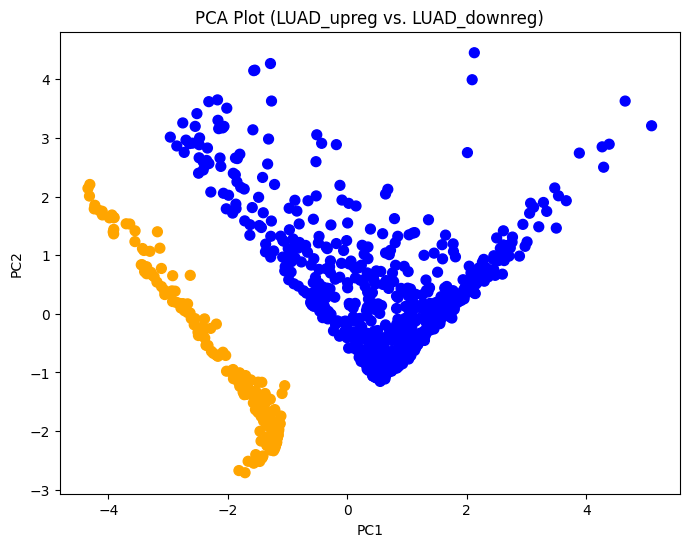

In [27]:
# Veri hazırlama (baseMean ve log2FoldChange kullanarak)
X = pd.concat([sig_luad_upreg[['padj', 'log2FoldChange', 'baseMean', 'lfcSE', 'stat', 'pvalue']], sig_luad_downreg[["padj", 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue']]], axis=0)
y = ['LUAD_upreg'] * len(sig_luad_upreg) + ['LUAD_downreg'] * len(sig_luad_downreg)  # Etiketler

# Standardizasyon (opsiyonel)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA uygula
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Renk eşleme
colors = {'LUAD_upreg': 'blue', 'LUAD_downreg': 'orange'}  # LUAD için mavi, LUSC için turuncu
c = [colors[label] for label in y]  # Etiketleri renklere dönüştür

# PCA plot çizdir
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=c, s=50)
plt.title('PCA Plot (LUAD_upreg vs. LUAD_downreg)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

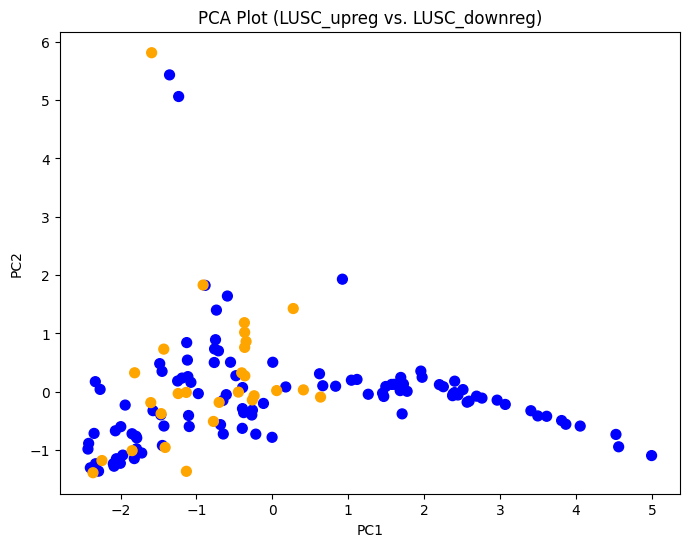

In [29]:
# Veri hazırlama (baseMean ve log2FoldChange kullanarak)
X = pd.concat([sig_lusc_upreg[['padj', 'log2FoldChange', 'baseMean', 'lfcSE', 'stat', 'pvalue']], sig_lusc_downreg[['padj', 'log2FoldChange', 'baseMean', 'lfcSE', 'stat', 'pvalue']]], axis=0)
y = ['LUSC_upreg'] * len(sig_lusc_upreg) + ['LUSC_downreg'] * len(sig_lusc_downreg)  # Etiketler

# Standardizasyon (opsiyonel)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA uygula
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Renk eşleme
colors = {'LUSC_upreg': 'blue', 'LUSC_downreg': 'orange'}  # LUAD için mavi, LUSC için turuncu
c = [colors[label] for label in y]  # Etiketleri renklere dönüştür

# PCA plot çizdir
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=c, s=50)
plt.title('PCA Plot (LUSC_upreg vs. LUSC_downreg)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [30]:
comb_luad = pd.read_csv(r"C:\Users\Yusuf\Desktop\staj\marmara\combined_stranded_luad_matrix.csv")
comb_luad.set_index(comb_luad["gene_id"], inplace=True, drop=True)
del comb_luad["gene_id"]
comb_lusc = pd.read_csv(r"C:\Users\Yusuf\Desktop\staj\marmara\combined_stranded_lusc_matrix.csv")
comb_lusc.set_index(comb_lusc["gene_id"], inplace=True, drop=True)
del comb_lusc["gene_id"]

In [32]:
mappingdf = pd.read_csv(r"C:\Users\Yusuf\Desktop\staj\marmara\datalar\mappingdf.tsv", sep="\t")

In [33]:
comb_luad = comb_luad.reset_index()
comb_lusc = comb_lusc.reset_index()

comb_luad = comb_luad.merge(mappingdf[['gene_id', 'gene_name']], on='gene_id', how='left')
comb_lusc = comb_lusc.merge(mappingdf[['gene_id', 'gene_name']], on='gene_id', how='left')

comb_luad = comb_luad.set_index(comb_luad["gene_name"])
comb_lusc = comb_lusc.set_index(comb_lusc["gene_name"])

comb_luad = comb_luad.drop(columns="gene_id")
comb_lusc = comb_lusc.drop(columns="gene_id")
comb_luad = comb_luad.drop(columns="gene_name")
comb_lusc = comb_lusc.drop(columns="gene_name")

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_20920\2691613513.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comb_luad = comb_luad.reset_index()
C:\Users\Yusuf\AppData\Local\Temp\ipykernel_20920\2691613513.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comb_lusc = comb_lusc.reset_index()


In [34]:
comb_luad

,sample_1,sample_10,sample_100,sample_101,sample_102,sample_103,sample_104_control,sample_105,sample_106_control,sample_107_control,sample_108,sample_109,sample_110,sample_111,sample_112,sample_113,sample_114,sample_115,sample_116,sample_117,sample_118_control,sample_119_control,sample_11_control,sample_12,sample_120,sample_121,sample_122,sample_123,sample_124_control,sample_125,sample_126,sample_127,sample_128,sample_129_control,sample_13,sample_130,sample_131,sample_132,sample_133,sample_134,sample_135,sample_136,sample_137,sample_138,sample_139_control,sample_14,sample_140,sample_141_control,sample_142,sample_143,...,sample_595,sample_596,sample_597,sample_598,sample_599_control,sample_6,sample_60,sample_600,sample_61,sample_62,sample_63,sample_64_control,sample_65,sample_66,sample_67,sample_68,sample_69,sample_7,sample_70,sample_71,sample_72_control,sample_73,sample_74,sample_75_control,sample_76,sample_77,sample_78,sample_79,sample_8,sample_80,sample_81,sample_82,sample_83,sample_84_control,sample_85,sample_86,sample_87,sample_88,sample_89,sample_9,sample_90,sample_91,sample_92_control,sample_93,sample_94,sample_95,sample_96,sample_97,sample_98,sample_99
gene_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TSPAN6,0,2405,900,945,775,1426,961,1139,752,605,2253,1671,2594,346,463,1487,1962,935,1207,284,1836,2392,396,1172,400,4018,0,2977,1623,883,1279,3553,805,1800,1322,1946,1953,4251,1096,2309,621,2348,2077,2621,1899,2023,3656,1604,961,1,...,1981,1232,800,1317,1479,1729,752,382,0,4425,1855,1052,934,2579,4537,1980,3564,1176,472,1297,266,628,579,1507,1174,573,559,1284,1341,1053,1159,418,785,1912,2283,2223,2167,1782,723,4306,0,1684,1206,1588,663,513,609,3177,1203,1137
TNMD,16,2,1,0,68,1,2,0,1,2,0,5,1,54,0,0,1,3,0,1,1,0,1,2,2,27,2,0,0,0,1,0,0,97,4,0,3,1,0,0,0,0,0,0,5,0,2,0,0,10,...,1,7,0,0,1,9,0,4,16,0,9,0,3,0,1,2,1,0,0,0,1,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0,1,157,0,1,41,1,0,1,0,0,0,0,1,0
DPM1,10,763,717,551,265,524,472,890,600,371,538,489,824,444,378,1128,1527,843,462,696,926,816,450,496,488,1563,11,1324,788,320,752,996,665,474,790,1450,900,1157,812,1331,1979,798,1298,624,827,1666,762,459,1045,22,...,1156,660,649,802,394,837,982,396,12,708,351,514,470,1377,2309,1234,566,721,649,377,344,203,790,729,848,256,619,1967,589,493,428,521,598,785,656,1034,1237,413,584,1137,50,1277,524,1010,696,595,679,1008,1365,1996
SCYL3,247,1657,450,680,261,375,195,265,458,284,854,299,723,478,246,1216,1146,961,523,404,619,432,216,952,247,850,138,703,927,309,444,796,312,387,816,1441,963,1165,643,1323,314,657,1063,773,791,631,565,542,806,505,...,1205,673,526,597,619,670,544,423,328,914,347,603,371,898,844,1020,891,662,1045,417,305,210,577,725,667,124,846,898,551,321,955,722,472,628,807,1210,1729,574,381,864,447,558,488,538,289,361,802,552,708,1850
C1orf112,414,924,225,530,175,263,197,210,445,111,348,187,604,295,146,825,1006,492,290,298,325,466,127,390,128,471,243,990,516,157,328,457,167,231,492,1223,681,902,474,791,271,515,997,584,432,610,423,324,475,247,...,841,533,280,486,375,492,492,224,313,531,167,323,316,967,862,471,365,537,608,246,143,87,384,406,426,101,724,409,384,181,478,365,355,401,929,631,1282,431,295,577,651,580,378,413,291,175,760,399,880,1304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC008763.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
AL592295.6,0,209,145,165,69,99,87,96,83,80,44,63,118,220,64,309,143,222,122,75,93,114,46,243,94,127,0,184,178,62,117,171,33,53,184,373,404

In [35]:
comb_luscc = comb_lusc.loc[sig_lusc.index.tolist()]
comb_luad = comb_luad.loc[sig_luad.index.tolist()]

comb_luad_upreg = comb_luad.loc[sig_luad_upreg.index.tolist()]
comb_luad_downreg = comb_luad.loc[sig_luad_downreg.index.tolist()]

comb_lusc_upreg = comb_lusc.loc[sig_lusc_upreg.index.tolist()]
comb_lusc_downreg = comb_lusc.loc[sig_lusc_downreg.index.tolist()]

comb_luscc = comb_luscc.T
comb_luad = comb_luad.T

comb_luad_upreg = comb_luad_upreg.T
comb_luad_downreg =comb_luad_downreg.T

comb_lusc_upreg = comb_lusc_upreg.T
comb_lusc_downreg = comb_lusc_downreg.T

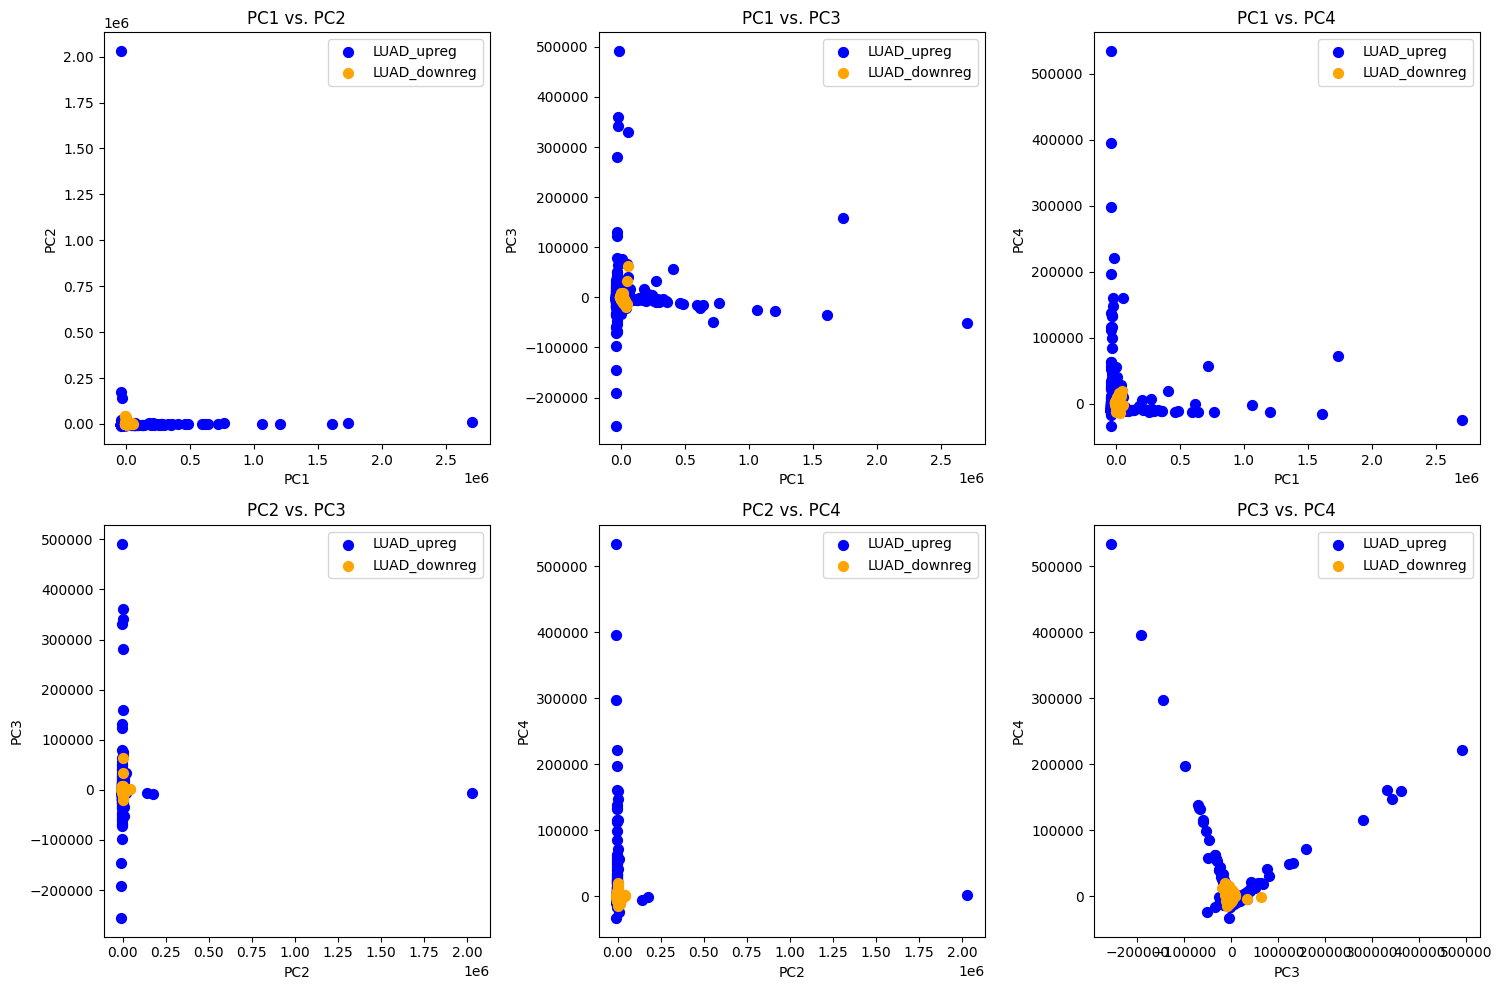

In [45]:
# PCA için bileşen kombinasyonları
pc_combinations = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

# LUAD_upreg için PCA
pca_upreg = PCA(n_components=4)  # 4 bileşen hesapla
X_upreg_pca = pca_upreg.fit_transform(comb_luad_upreg)

# LUAD_downreg için PCA
pca_downreg = PCA(n_components=4)
X_downreg_pca = pca_downreg.fit_transform(comb_luad_downreg)

# Grafikleri çizdirme
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (pc_x, pc_y) in enumerate(pc_combinations):
    ax = axes[i // 3, i % 3]  # Alt grafiği seç

    # LUAD_upreg için scatter plot
    ax.scatter(X_upreg_pca[:, pc_x - 1], X_upreg_pca[:, pc_y - 1], c='blue', s=50, label='LUAD_upreg')

    # LUAD_downreg için scatter plot
    ax.scatter(X_downreg_pca[:, pc_x - 1], X_downreg_pca[:, pc_y - 1], c='orange', s=50, label='LUAD_downreg')

    ax.set_title(f'PC{pc_x} vs. PC{pc_y}')
    ax.set_xlabel(f'PC{pc_x}')
    ax.set_ylabel(f'PC{pc_y}')
    ax.legend()

plt.tight_layout()
plt.savefig("luad_pca_upreg_downreg_plots.png")
plt.show()


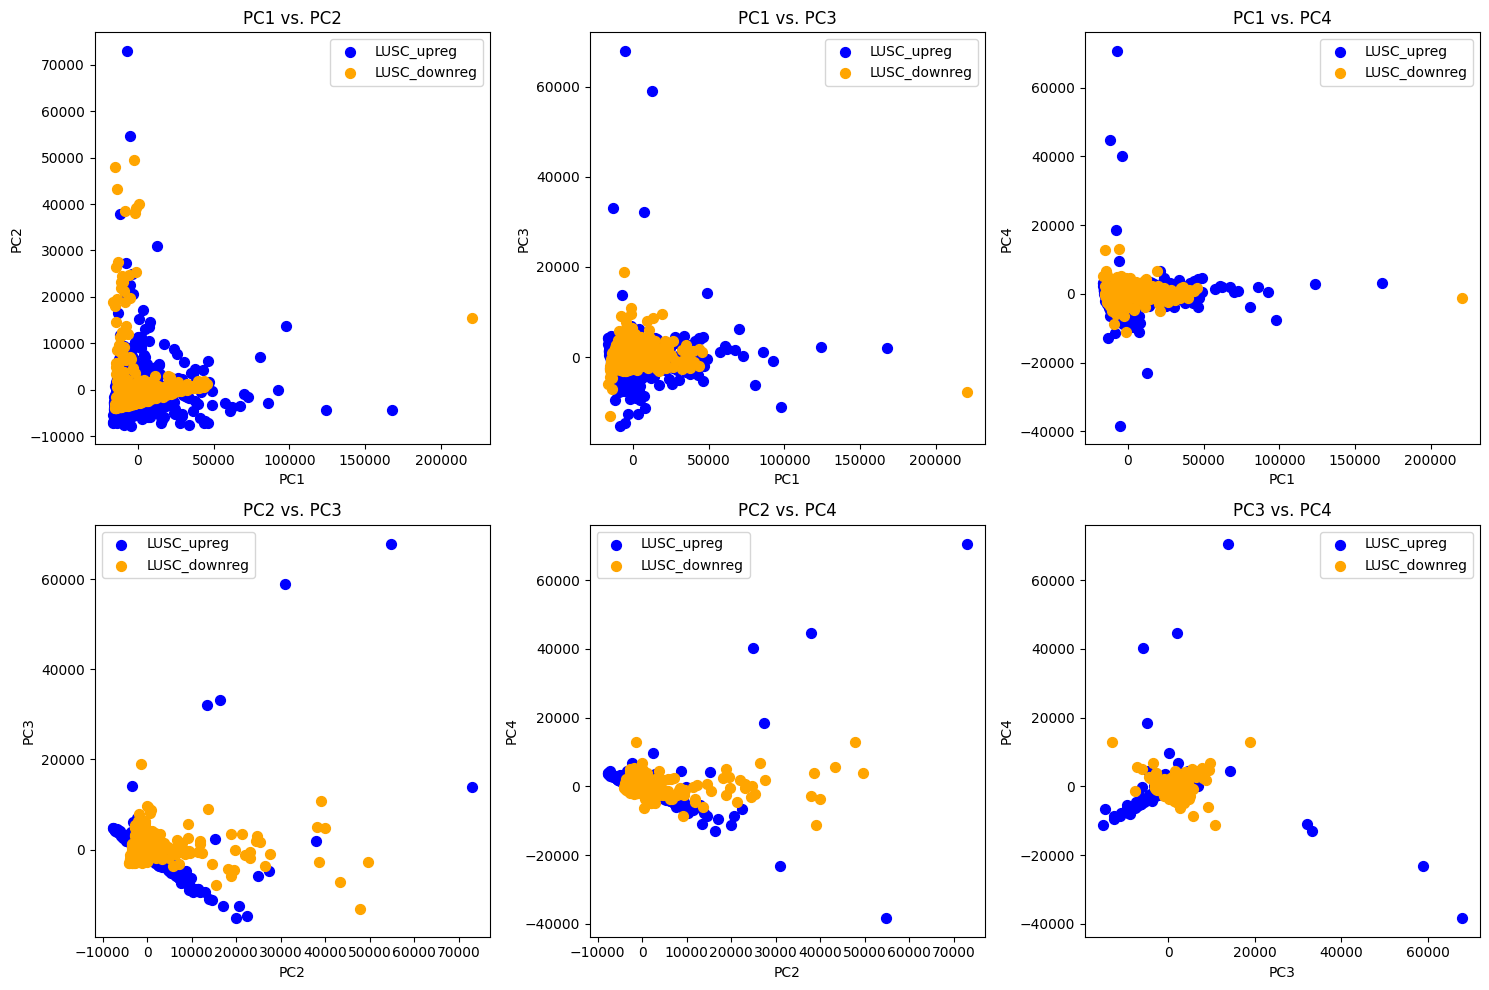

In [48]:
# PCA için bileşen kombinasyonları
pc_combinations = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

# LUAD_upreg için PCA
pca_upreg = PCA(n_components=4)  # 4 bileşen hesapla
X_upreg_pca = pca_upreg.fit_transform(comb_lusc_upreg)

# LUAD_downreg için PCA
pca_downreg = PCA(n_components=4)
X_downreg_pca = pca_downreg.fit_transform(comb_lusc_downreg)

# Grafikleri çizdirme
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (pc_x, pc_y) in enumerate(pc_combinations):
    ax = axes[i // 3, i % 3]  # Alt grafiği seç

    # LUAD_upreg için scatter plot
    ax.scatter(X_upreg_pca[:, pc_x - 1], X_upreg_pca[:, pc_y - 1], c='blue', s=50, label='LUSC_upreg')

    # LUAD_downreg için scatter plot
    ax.scatter(X_downreg_pca[:, pc_x - 1], X_downreg_pca[:, pc_y - 1], c='orange', s=50, label='LUSC_downreg')

    ax.set_title(f'PC{pc_x} vs. PC{pc_y}')
    ax.set_xlabel(f'PC{pc_x}')
    ax.set_ylabel(f'PC{pc_y}')
    ax.legend()

plt.tight_layout()
plt.savefig("lusc_pca_upreg_downreg_plots.png")
plt.show()

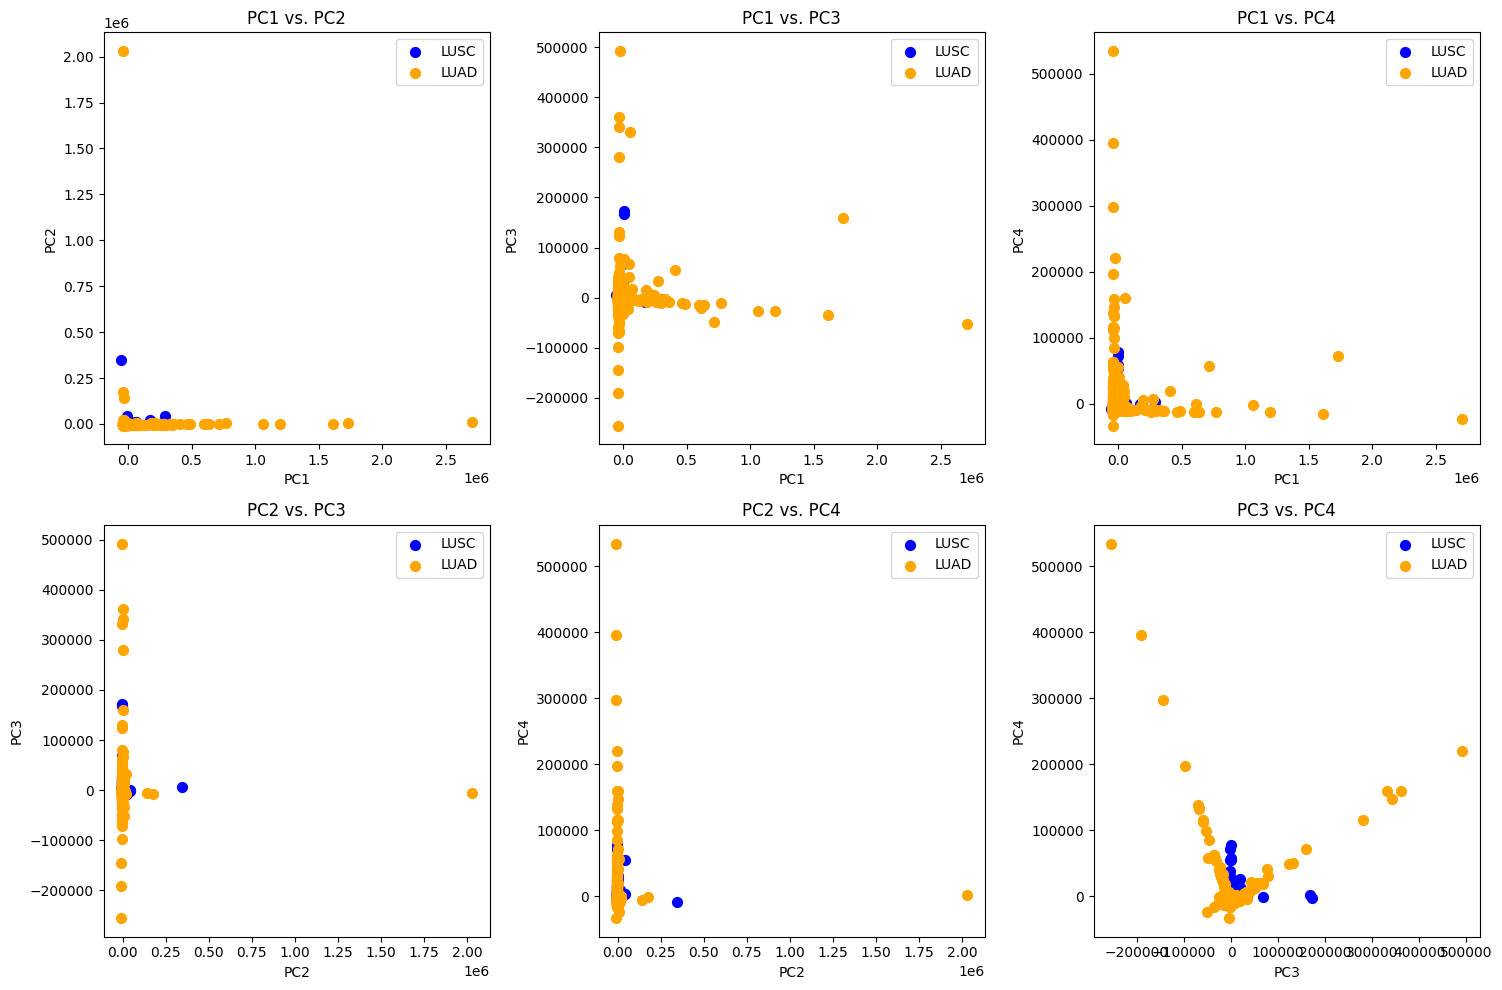

In [49]:
# PCA için bileşen kombinasyonları
pc_combinations = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

# LUAD_upreg için PCA
pca_upreg = PCA(n_components=4)  # 4 bileşen hesapla
X_upreg_pca = pca_upreg.fit_transform(comb_luscc)

# LUAD_downreg için PCA
pca_downreg = PCA(n_components=4)
X_downreg_pca = pca_downreg.fit_transform(comb_luad)

# Grafikleri çizdirme
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (pc_x, pc_y) in enumerate(pc_combinations):
    ax = axes[i // 3, i % 3]  # Alt grafiği seç

    # LUAD_upreg için scatter plot
    ax.scatter(X_upreg_pca[:, pc_x - 1], X_upreg_pca[:, pc_y - 1], c='blue', s=50, label='LUSC')

    # LUAD_downreg için scatter plot
    ax.scatter(X_downreg_pca[:, pc_x - 1], X_downreg_pca[:, pc_y - 1], c='orange', s=50, label='LUAD')

    ax.set_title(f'PC{pc_x} vs. PC{pc_y}')
    ax.set_xlabel(f'PC{pc_x}')
    ax.set_ylabel(f'PC{pc_y}')
    ax.legend()

plt.tight_layout()
plt.savefig("pca_LUAD_LUSC_plots.png")
plt.show()